## Day34.YOLO 細節理解 - 損失函數
今天的課程，我們講述了
* 損失函數是描述模型預測出來的結果和實際的差異的依據    
* YOLO 損失函數的設計包含物件位置的定位與物件類別辨識    
* YOLO損失函數透過超參數設定模型有不同的辨識能力    



### 作業
仔細觀察，bbox 寬高計算損失方式和bbox中心計算損失方式有哪邊不一樣嗎? 為什麼要有不同的設計?



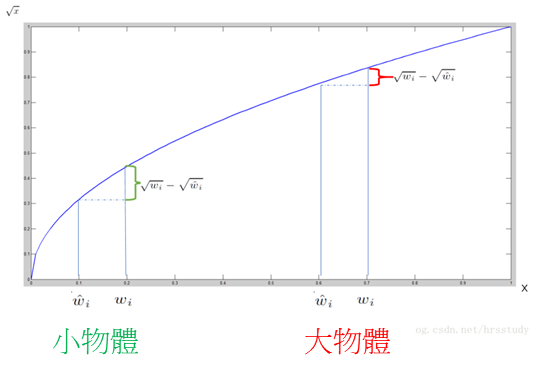

In [5]:
from IPython import display
display.Image("./HW_answer.png")


yolov1里作者在loss里对宽高都做了开根号处理，是为了使得大小差别比较大的边框差别减小。因为对不同大小的bbox预测中，想比于大的bbox预测偏差，小bbox预测偏差相同的尺寸对IOU影响更大，而均方误差对同样的偏差loss一样，为此取根号。例如，同样将一个 100x100 的目标与一个 10x10 的目标都预测大了 10 个像素，预测框为 110 x 110 与 20 x 20。显然第一种情况我们还可以接受，但第二种情况相当于把边界框预测大了 1 倍，但如果不使用根号函数，那么损失相同，但把宽高都增加根号时：




In [11]:
big_truth = [100,100]
big_predict = [110,110]
small_truth = [10,10]
small_predict = [20,20]

In [29]:
print(((small_predict[0]**0.5) - (small_truth[0]**0.5)) **2 * 2) 
print(((big_predict[0]**0.5) - (big_truth[0]**0.5)) **2 * 2 )

3.431457505076198
0.4764607319393811


In [30]:
print(((small_predict[0]) - (small_truth[0])) **2 * 2)
print(((big_predict[0]) - (big_truth[0])) **2 * 2)

200
200


同樣預測誤差10，小bbox的誤差結果其實是比大bbox大的，如果沒有取平方根則不符合實際狀況

參考資料

https://medium.com/%E7%A8%8B%E5%BC%8F%E5%B7%A5%E4%BD%9C%E7%B4%A1/yolo-v1-%E7%89%A9%E4%BB%B6%E5%81%B5%E6%B8%AC-%E8%AB%96%E6%96%87%E6%95%B4%E7%90%86-935bfd51d5e0

https://zhuanlan.zhihu.com/p/49995236